In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
#dataset import
dataset = pd.read_csv('mobile_train.csv')
dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])

#One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])

#Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

Normalized data:
[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]
One hot encoded array:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [9]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=1, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
1800/1800 [==============================] - 0s 125us/step - loss: 1.6181 - acc: 0.1844


In [18]:
model.evaluate(X_test,y_test)

200/200 [==============================] - 0s 58us/step


[1.584498977661133, 0.17]

In [19]:
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)


Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 31us/step - loss: 1.5308 - acc: 0.1911 - val_loss: 1.5232 - val_acc: 0.1950
Epoch 2/100
1800/1800 [==============================] - 0s 40us/step - loss: 1.4854 - acc: 0.2094 - val_loss: 1.4844 - val_acc: 0.2200
Epoch 3/100
1800/1800 [==============================] - 0s 31us/step - loss: 1.4562 - acc: 0.2244 - val_loss: 1.4610 - val_acc: 0.2100
Epoch 4/100
1800/1800 [==============================] - 0s 29us/step - loss: 1.4368 - acc: 0.2367 - val_loss: 1.4436 - val_acc: 0.2100
Epoch 5/100
1800/1800 [==============================] - 0s 39us/step - loss: 1.4216 - acc: 0.2528 - val_loss: 1.4298 - val_acc: 0.2250
Epoch 6/100
1800/1800 [==============================] - 0s 29us/step - loss: 1.4098 - acc: 0.2639 - val_loss: 1.4177 - val_acc: 0.2500
Epoch 7/100
1800/1800 [==============================] - 0s 28us/step - loss: 1.3998 - acc: 0.2706 - val_loss: 1.4074 - val_acc: 0.2600
E

1800/1800 [==============================] - 0s 24us/step - loss: 0.6195 - acc: 0.7644 - val_loss: 0.6072 - val_acc: 0.7400
Epoch 61/100
1800/1800 [==============================] - 0s 27us/step - loss: 0.6095 - acc: 0.7689 - val_loss: 0.5981 - val_acc: 0.7450
Epoch 62/100
1800/1800 [==============================] - 0s 69us/step - loss: 0.5996 - acc: 0.7739 - val_loss: 0.5881 - val_acc: 0.7500
Epoch 63/100
1800/1800 [==============================] - 0s 61us/step - loss: 0.5902 - acc: 0.7756 - val_loss: 0.5784 - val_acc: 0.7650
Epoch 64/100
1800/1800 [==============================] - 0s 27us/step - loss: 0.5806 - acc: 0.7817 - val_loss: 0.5692 - val_acc: 0.7750
Epoch 65/100
1800/1800 [==============================] - 0s 50us/step - loss: 0.5717 - acc: 0.7911 - val_loss: 0.5605 - val_acc: 0.7800
Epoch 66/100
1800/1800 [==============================] - 0s 50us/step - loss: 0.5628 - acc: 0.7967 - val_loss: 0.5516 - val_acc: 0.7900
Epoch 67/100
1800/1800 [==============================

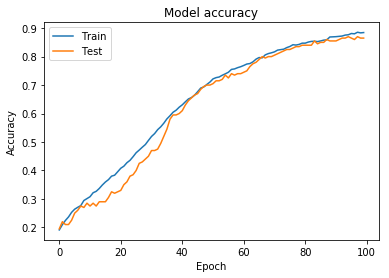

In [20]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

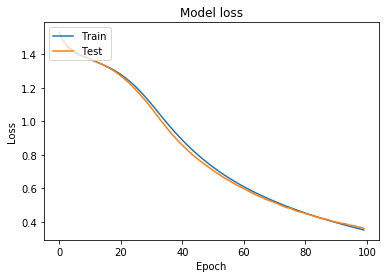

In [22]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()